<a href="https://colab.research.google.com/github/alezab/cs-ai/blob/master/AI_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Załaduj dane fashion_mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
# Budowa bardziej złożonej sieci neuronowej
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(
    optimizer=SGD(learning_rate=0.05),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
fit = model.fit(X_train, y_train, epochs=100,
                batch_size=256,
                validation_data=(X_test, y_test),
                callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6098 - loss: 1.1926 - val_accuracy: 0.7951 - val_loss: 0.5714
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8042 - loss: 0.5478 - val_accuracy: 0.8078 - val_loss: 0.5357
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8328 - loss: 0.4703 - val_accuracy: 0.8371 - val_loss: 0.4586
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8494 - loss: 0.4248 - val_accuracy: 0.8350 - val_loss: 0.4608
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8532 - loss: 0.4052 - val_accuracy: 0.8533 - val_loss: 0.4147
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8655 - loss: 0.3757 - val_accuracy: 0.8505 - val_loss: 0.4096
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8694 - loss: 0.3621 - val_accuracy: 0.8123 - val_loss: 0.4960
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8704 - loss: 0.3550 - val_acc

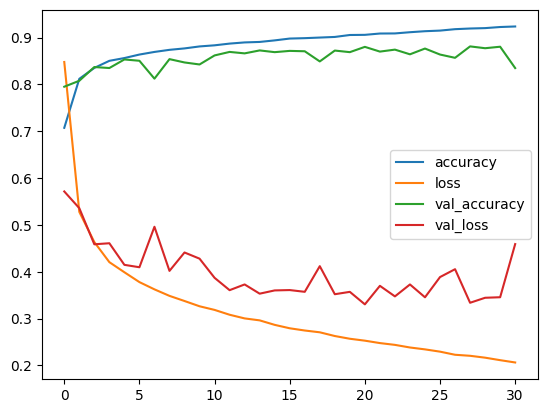

In [8]:
pd.DataFrame(fit.history).plot();

In [9]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8803 - loss: 0.3312


[0.33032774925231934, 0.8802000284194946]

In [10]:
model.evaluate(X_train, y_train, batch_size=256)

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9109 - loss: 0.2426


[0.2425960749387741, 0.9110666513442993]

In [11]:
y_test_pred = fit.model.predict(X_test, batch_size=256).argmax(axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


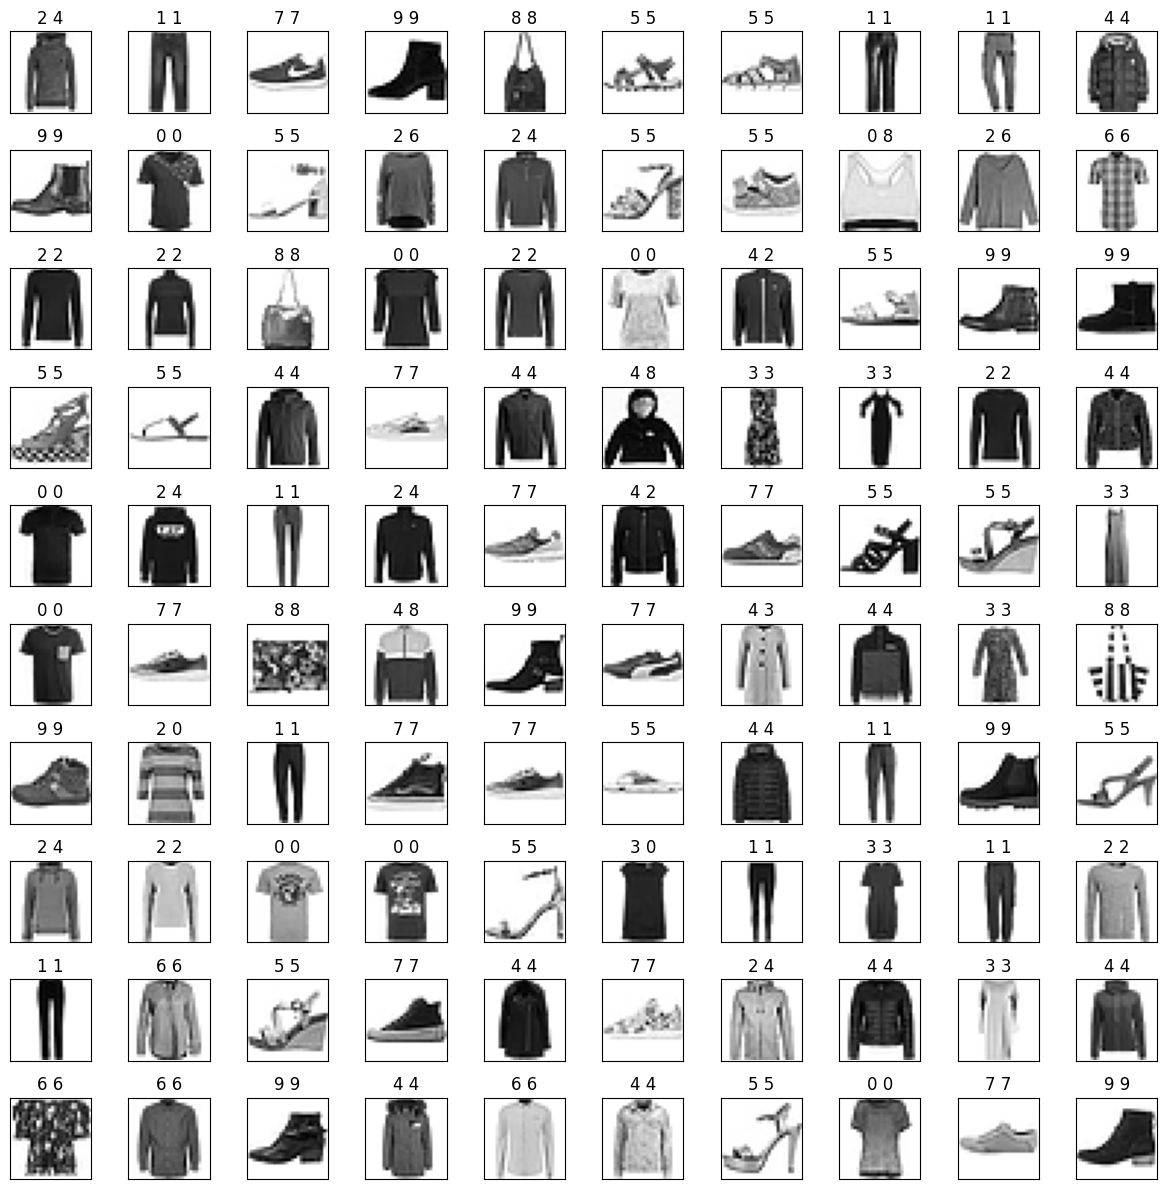

In [13]:
fig, ax = plt.subplots(10, 10, figsize=(12, 12))
k = 0
ind = np.random.randint(10000, size=100)
for i in range(10):
  for j in range(10):
    n = ind[k]
    ax[i, j].imshow(X_test[n], cmap='gray_r')
    ax[i, j].axes.get_xaxis().set_ticks([])
    ax[i, j].axes.get_yaxis().set_ticks([])
    ax[i, j].set_title('{} {}'.format(y_test[n], y_test_pred[n]))
    k += 1
fig.tight_layout()